# TME1 : premier pas en traitement d'image avec Python et Jupyter

> Consignes: le fichier **TME1_Sujet.ipynb** est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2019/course/view.php?id=4248. Si vous êtes en binôme, renommez-le en **TME1_nom1_nom2.ipynb**.

Pour ce premier TME, qui consiste à réaliser des opérations de base de traitement d'image, nous utiliserons uniquement le language Python natif, sans module particulier et cela pour bien comprendre ce qu'est une image sur le disque et sa représentation en mémoire, une liste de valeurs, organisée en lignes de pixels.

Les deux fonctions suivantes permettent respectivement de lire et d'écrire sur le disque des images au format Portable Grey Map (PGM). Elle utilise le type formel <tt>Image</tt> qui est <tt>tuple[list[int],int,int]</tt>, selon les conventions du cours 1I001. Le premier élément est la liste des pixels de l'image, ordonnée ligne par ligne, le second élément est la longueur d'une ligne (soit le nombre de pixels dans une ligne), et le troisième le nombre de lignes.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def readPGM(file):
    """  str -> tuple[list[int],int,int] | NoneType
    Lit un fichier PGM et retourne la liste des valeurs de 
    l'image et ses dimensions (nombre de colonnes, nombre de lignes).
    """
    fp = open(file,'rb')
    # en mode binaire, readline() retourne un type 'bytes'
    if fp.readline() == b'P5\n':
        while True:
            # lecture d'une ligne, conversion vers str
            line = fp.readline().decode()
            if line[0] != '#': break
        # découpage en mots, puis conversion        
        w,h=line.split()
        w,h=int(w),int(h)
        # Nb de niveaux de gris (pas utile mais il faut le lire)
        l=fp.readline()
        # données
        data = list(fp.read(w*h))
        if len(data) != w*h:
            print ('readPGM: error with ' + file + ': has wrong size')
        fp.close()
        return (data,w,h)
    else:
        print( 'readPGM: error with '+ file + ': unsupported format')
    fp.close()
    return None

def writePGM(image,file):
   """ tuple(list[int],int,int)*str -> NoneType
   Ecrit une image au format PGM 
   """
   data,w,h = image
   fp = open(file,'wb')
   fp.writelines([bytes('P5\n'+str(w)+' '+str(h)+'\n255\n','utf8')])
   fp.write(bytearray(data))
   fp.close()

Pour voir une image, nous utiliserons une commande de votre système (normalement Linux Debian) qui affichera l'image lu depuis le disque. Si vous utilisez un autre système d'exploitation (OSX ou Windows), il faudra utiliser un programme spécifique.     

In [2]:
from os import system

def viewImage(image):
    """ tuple[list[int],int,int] -> NoneType
    Lit et affiche une image depuis le disque
    """
    writePGM(image,'viewimage.pgm')
    system( 'xdg-open viewimage.pgm')
    #system( 'rm -f viewimage.pgm')


# Exercice 1: visualisation et histogramme

## 1.1 Voir une image
Écrire un code python qui lit l'image <tt>img/carrefou.pgm</tt> l'affiche à l'écran et imprime ses dimensions.

In [3]:
result = readPGM("img/couloir.pgm")
viewImage(result)

## 1.2 Calcul d'histogramme

Écrire une fonction <tt>histogram()</tt> qui prend la liste des valeurs d'une image, un entier <tt>n</tt> et retourne une liste des <tt>n</tt> valeurs représentant l'histogramme de l'image.

In [4]:
def histogram(data,n):
    """ list[int]*int > list[int] """
    #initialiser un dictionnaire de 256 case 
    hist = [0]*n
    # nombre de pixel w*h
    nbPix = len(data)

    for i in range(nbPix):
        hist[data[i]]+=1
        
    return hist

def plot_hist(hist, name=""):
    x =np.arange(256)
    plt.bar(x, height=hist)
    if name != "":
        plt.save("hist_"+name+".png")

## 1.3 Affichage d'histogramme
Écrire un code Python qui charge une image, calcule son histogramme, et l'affiche l'histogramme sous forme textuelle, par exemple:
<pre>
0 -> 3
1 -> 5
2 -> 10
 ...
</pre>
Dans cet exemple, il faut lire qu'il y a 3 pixels de valeur 0, 5 pixels de valeur 1 et 10 pixels de valeur 2, _etc_.


In [5]:
result = readPGM("img/carrefou.pgm")
hist = histogram(result[0], 256)

for i, j in enumerate(hist):
    print(i, "->", j)

0 -> 0
1 -> 0
2 -> 2
3 -> 0
4 -> 0
5 -> 0
6 -> 2
7 -> 4
8 -> 8
9 -> 9
10 -> 10
11 -> 5
12 -> 14
13 -> 19
14 -> 63
15 -> 370
16 -> 663
17 -> 318
18 -> 123
19 -> 135
20 -> 145
21 -> 167
22 -> 197
23 -> 184
24 -> 238
25 -> 285
26 -> 291
27 -> 335
28 -> 382
29 -> 347
30 -> 411
31 -> 422
32 -> 445
33 -> 518
34 -> 544
35 -> 564
36 -> 598
37 -> 646
38 -> 709
39 -> 686
40 -> 795
41 -> 852
42 -> 960
43 -> 1012
44 -> 1084
45 -> 1221
46 -> 1255
47 -> 1277
48 -> 1379
49 -> 1416
50 -> 1540
51 -> 1606
52 -> 1693
53 -> 1689
54 -> 1746
55 -> 1794
56 -> 1748
57 -> 1702
58 -> 1702
59 -> 1673
60 -> 1578
61 -> 1521
62 -> 1388
63 -> 1378
64 -> 1270
65 -> 1207
66 -> 1128
67 -> 1067
68 -> 1035
69 -> 1007
70 -> 930
71 -> 920
72 -> 875
73 -> 789
74 -> 740
75 -> 731
76 -> 651
77 -> 573
78 -> 608
79 -> 563
80 -> 495
81 -> 558
82 -> 467
83 -> 418
84 -> 405
85 -> 351
86 -> 346
87 -> 345
88 -> 310
89 -> 285
90 -> 278
91 -> 263
92 -> 222
93 -> 221
94 -> 215
95 -> 201
96 -> 209
97 -> 188
98 -> 180
99 -> 153
100 -> 14

# Exercice 2: étirement d'histogramme
## 2.1 Étirement 
Écrire la fonction <tt>etire()</tt> qui prend un histogramme et retourne un tableau (une liste Python) des correspondance entre niveaux de gris avant et après étirement. L'histogramme doit être étiré sur la dynamique la plus grande, c'est-à-dire [0,255]. Si <tt>table</tt> est la liste retournée et si <tt>table[0]</tt> vaut 2, cela signifie que les pixels ayant le niveau de gris 0 auront alors la valeur 2 après étirement de l'histogramme. Indication: utiliser une des fonctions d'arrondis (<tt>floor</tt>, <tt>ceil</tt>, ...) du module Python <tt>math</tt>

In [37]:
from math import ceil

def etire(his):
    """ list[int] -> list[int] """
    
    for (i, x) in enumerate(reversed(his)):
        if x > 0:
            max = 255-i
            print("max = ", max)
            break
    for (i, x) in enumerate(hist):
        if x > 0:
            min = i
            print("min = ", min)
            break
    
    #table = list(map(lambda x: ceil(256*(x-min)/(max-min)) , list(range(256))))
    table=list(range(256))
    
    for i in range(min, max):
        table[i] = ceil((i-min)/(max-min)*255)
    
    return table


## 2.2 Changement des valeurs de l'image
Écrire la fonction <tt>applique()</tt> qui applique la table obtenue par la fonction <tt>etire()</tt> à la liste des valeurs de l'image pour former une nouvelle image son histogramme étiré.

max =  127
min =  2


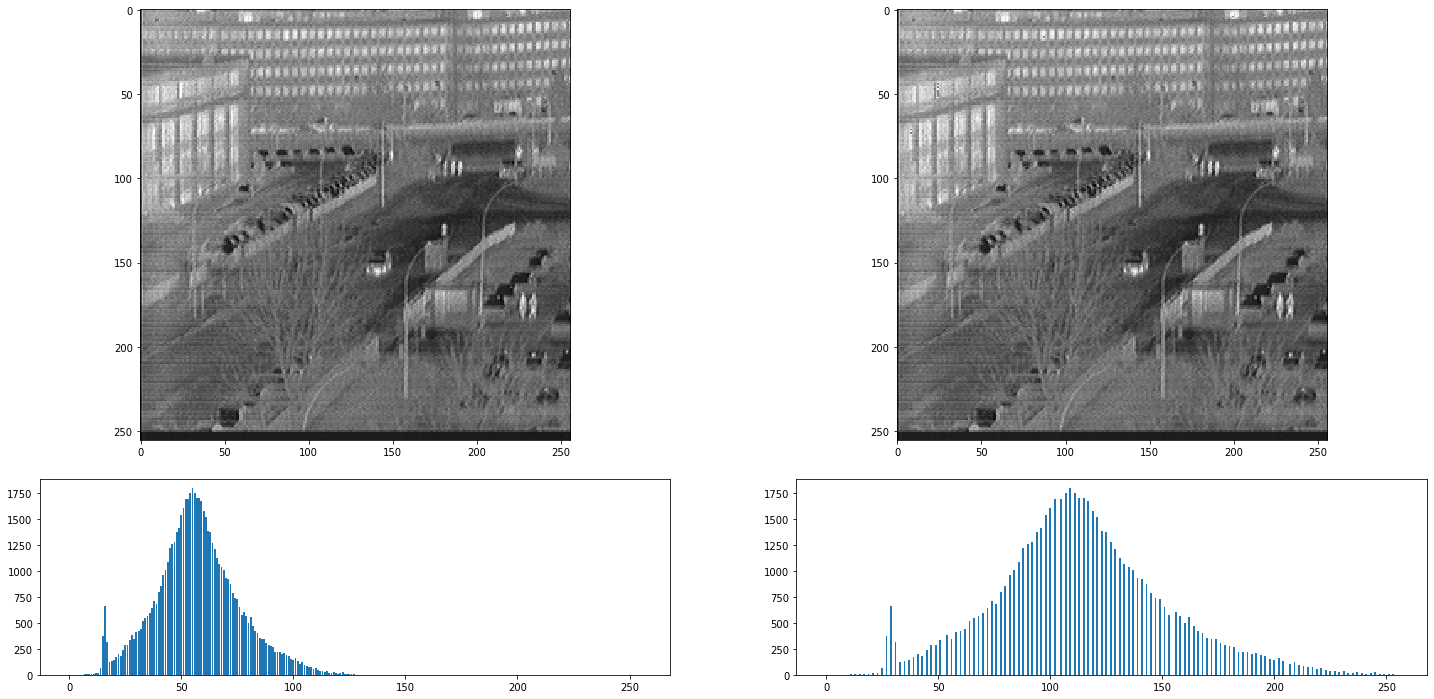

In [47]:
def applique(data,table):
    """ list[int]*list[int] -> list[int] """
    nbPix = len(data)

    for i in range(nbPix):
        data[i] = table[data[i]]
def plot_2_image_hist(image1, image2, hist1, hist2):
    figure, ax = plt.subplots(figsize=(20, 10))
    ax.set_title("Comparaison histogram")
    gridsize = (3, 2)
    plt.tight_layout()
    plt.subplot2grid(gridsize, (0, 0), rowspan=2)
    plt.imshow(np.array(image1[0]).reshape(image1[2], image1[1]), cmap='gray')
    plt.subplot2grid(gridsize, (0, 1), rowspan=2)
    plt.imshow(np.array(image2[0]).reshape(image2[2], image2[1]), cmap='gray')
    plt.subplot2grid(gridsize, (2, 0))
    plt.bar(np.arange(len(hist1)), hist1)
    plt.subplot2grid(gridsize, (2, 1))
    plt.bar(np.arange(len(hist2)), hist2)
    
def copy_image(image):
    (data, w, h) = image
    image2 = data.copy(), w, h
    return image2

 

result = readPGM("img/carrefou.pgm")
result_copie = copy_image(result)

hist = histogram(result[0], 256)
#viewImage(result)
table = etire(hist)
applique(result_copie[0], table)
hist2 = histogram(result_copie[0], 256)
#viewImage(result)
plot_2_image_hist(result, result_copie, hist, hist2) 

def etirer_image(image):
    result_copie = copy_image(image)

    hist = histogram(image[0], 256)
    #viewImage(result)
    table = etire(hist)
    applique(result_copie[0], table)
    
    return result_copie

## 2.3 Application
Mettre en oeuvre les fonctions précédentes sur les images mises à votre disposition. Visualisez le résultat à l'aide de la fonction <tt>viewImage()</tt>.
Attention: certaines images ont déjà un histogramme étiré ! Comment le vérifier ? (répondre en commentaire dans le code Python ci-dessous).

In [39]:
## certaines images sont déjà étirées car si on comparrai le histogram avant et apres etirement, l'image restera la meme
## si l'image couvre tout le spectre des couleurs, l'operation de l'etirement consisterai a faire un /255 * 255 ce qui revient au meme
## pour verifier cela il suffit juste de verifier le min et max, ou a l'extreme calculer l'histogram
from os import listdir
from os.path import isfile, join

files = [f for f in listdir("img") if isfile(join("img", f))]
print(files)

def apply_all(effects, name="traitement_"):
    for i in files:
        image = readPGM(join("img", i)) 
        if image != None:
            for effect in effects:
                image = effect(image)
            writePGM(image, join("hist_etire/", name+i))


['angiogra.pgm', 'belemn.pgm', 'carrefou.pgm', 'couloir.pgm', 'echograp.pgm', 'lena.pgm', 'muscle.pgm', 'oursin.pgm']


# Exercice 3: seuillage d'images
## 3.1 Fonction de seuillage
Écrire la fonction <tt>seuillage()</tt> qui prend une liste de pixels <tt>data</tt>, un paramètre de seuil <tt>t</tt>. La liste de valeurs retournées sera consitituée d'une liste de valeur à 0 (pour les valeurs en dessous du seuil <tt>t</tt>) ou 255 (pour les autres valeurs).


In [40]:
def seuillage(data,t):
    """ list[int]*int -> list[int] """
    for i in range(len(data)):
        data[i] = 255 if data[i] > t else 0
        
def seuillage_image(image):
    image_copie = copy_image(image)
    seuillage(image_copie[0], 100)
    return image_copie

## 3.2 Application
Appliquer la fonction de seuillage à différentes images et faire varier le seuil. Utiliser la fonction <tt>viewImage()</tt> pour visualiser ces opérations de seuillage.

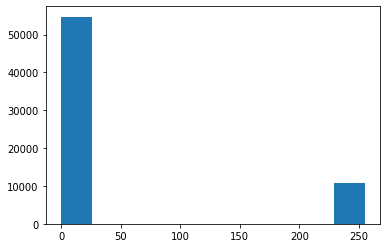

In [41]:
result = readPGM("img/couloir.pgm")
#plt.hist(result[0])
seuillage(result[0], 100)
plt.hist(result[0])
#writePGM(result, "img/couloir_etire.pgm")
#viewImage(result)
plot_hist(histogram(result[0], 256))
    
for i in files:
    image = readPGM(join("img", i)) 
    if image != None:
        
        seuillage(image[0], 100)
        
        writePGM(image, join("hist_etire/", "seuillage_"+i))

# Exercice 4: égalisation d'histogramme 
## 4.1 Égalisation
Écrire la fonction <tt>egalisation()</tt> qui prend un histogramme, applique une égalisation d'histogramme et retourne la table des correspondances entre niveaux de gris avant et après égalisation. L'égalisation d'histogramme consiste à transformer chaque valeur de niveau de gris $k$ en $k'$ selon la formule: $k' = Int\left(\frac{L-1}{N \times M}H_c(k)\right)$ où $H_c$ est l'histogramme cumulé, $N\times M$ la taille de l'image et $L$ la dynamique de l'image.

In [42]:
def egalisation(his):
    """ list[int] -> list[int] """
    table = list(range(256))
    nbPix = sum(his)
    somme = 0
    
    for i in range(len(his)):
        #pour l'histogramme cummullé
        somme += his[i]
        
        # valeur dans la table
        table[i] = int(255/nbPix * somme)
    

    return table 
    

## 4.2 Application
Écrire un code Python qui lit une image, réalise son égalisation d'histogramme et affiche la nouvelle image égalisée.

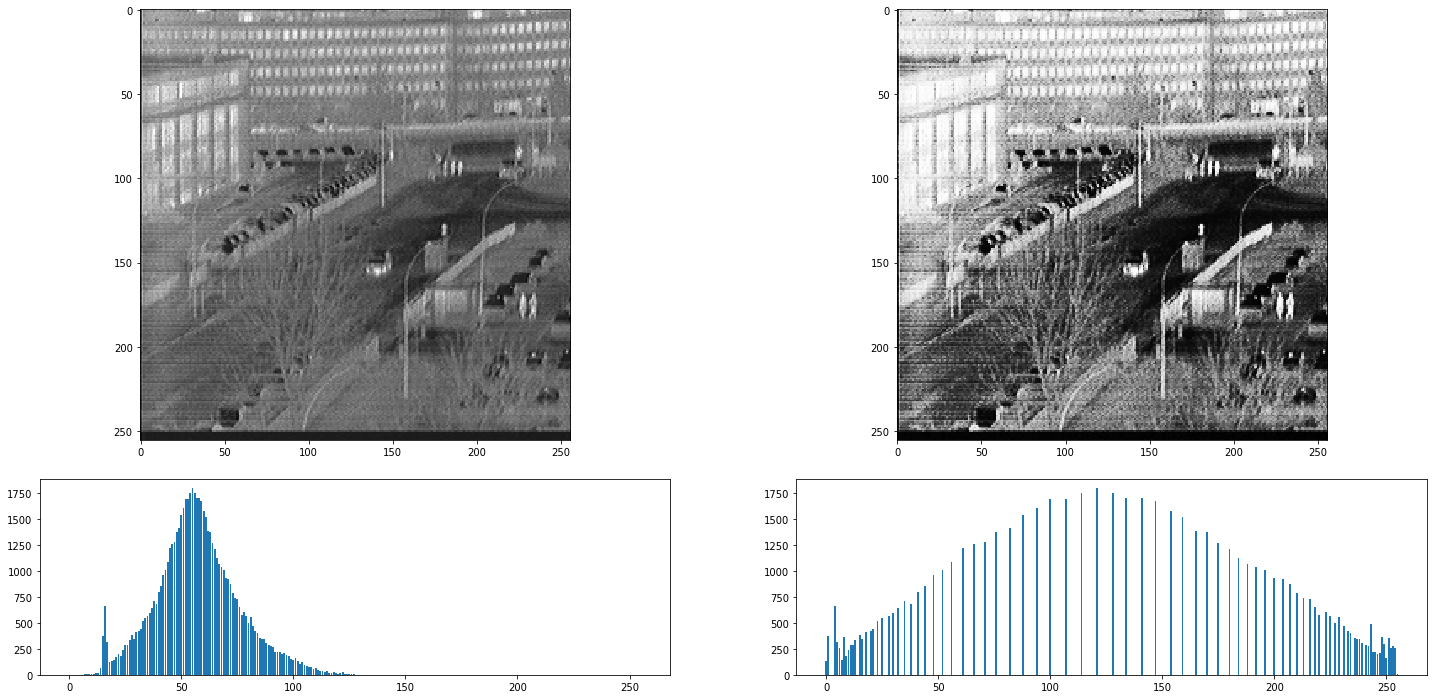

In [48]:
result = readPGM("img/carrefou.pgm")
result_copie = copy_image(result)

hist = histogram(result[0], 256)
#viewImage(result)
table = egalisation(hist)
applique(result_copie[0], table)
hist2 = histogram(result_copie[0], 256)
#viewImage(result)
plot_2_image_hist(result, result_copie, hist, hist2) 

In [44]:
def equaliser_image(image):
    image_copie = copy_image(image)
    hist = histogram(image[0], 256)
    #viewImage(result)
    table = egalisation(hist)
    applique(image_copie[0], table)
    
    return image_copie

In [45]:
#tester toutes les images

            
apply_all([etirer_image], name="etire_")
apply_all([seuillage_image], name="seuillage_")
apply_all([etirer_image, equaliser_image], name="etire_equalise_")


max =  255
min =  0
max =  154
min =  0
max =  127
min =  0
max =  255
min =  0
max =  127
min =  0
max =  227
min =  0
max =  249
min =  0
max =  174
min =  0
max =  255
min =  0
max =  154
min =  0
max =  127
min =  0
max =  255
min =  0
max =  127
min =  0
max =  227
min =  0
max =  249
min =  0
max =  174
min =  0
